# **ISING MODEL USING METROPOLIS ALGORITHM**
### **1.** **IN THE ABSENCE OF EXTERNAL FIELD**
>In the cell below i will be implementing Metropolis algorithm to a one dimensional array of spins and plotting some data(energy and magnetization) at different steps.Taking T = 1,J = 1 and random distributions of spins



  0%|          | 0/100000 [00:00<?, ?it/s]

Initial Energy E =  15


100%|██████████| 100000/100000 [00:01<00:00, 65902.96it/s]


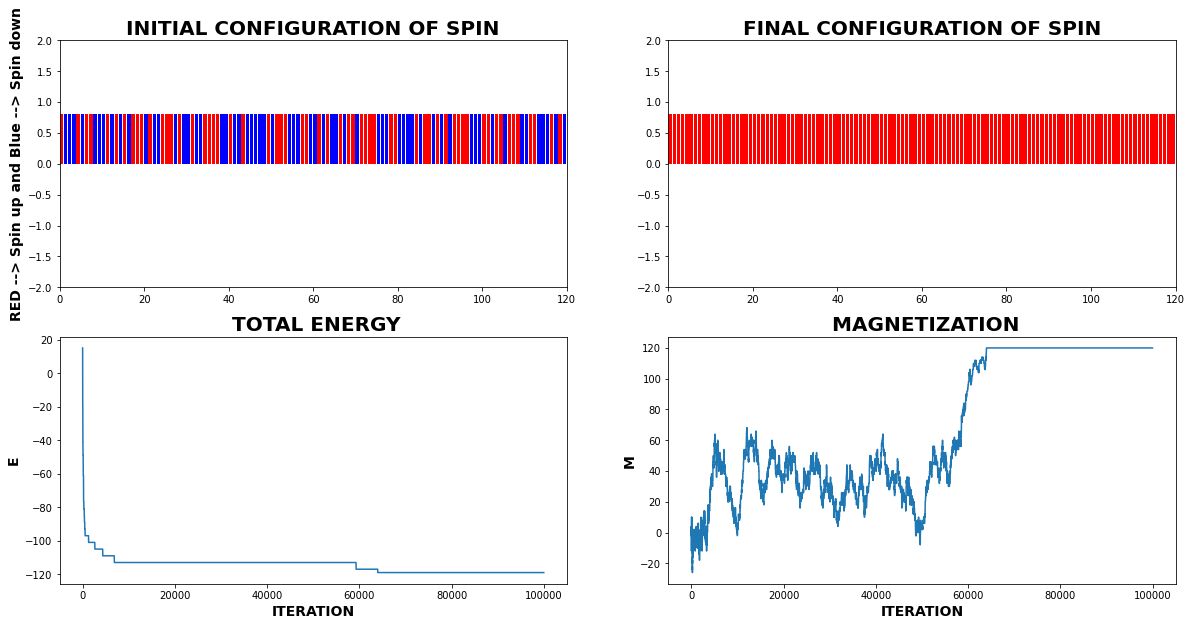

In [10]:
##importing libraries
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from matplotlib import patches as pt
N = 120  ##number of spins
spin_values = np.array([1,-1])
Spin_array = np.random.choice(spin_values,size = N)
#Spin_array = np.ones(N) ##spin array

J = 1
T = 0.05
Beta = 1.0/T


## Calculating initial energy  
energy = 0
for i in range(N-1):
    energy += -J*Spin_array[i]*Spin_array[i+1]
E = [energy]    ##storing energy value in a list
print('Initial Energy E = ', energy )
###########33
##initial magnetization
m = np.sum(Spin_array)


Mag = [m]  #list for magnetization
#print('Initial magnetization M  = ', m )



def spin_color(SS):   ## this function is for plotting spins. down spin is blue and up spin is red
    if SS==-1: return 'b';
    else: return 'r'
    
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (20,10)) ##creating figres

ax1.set_xlim(0,N)  
ax1.set_ylim(-2,2)
ax1.set_ylabel("RED --> Spin up and Blue --> Spin down",fontweight='bold',fontsize='14')
ax1.set_title("INITIAL CONFIGURATION OF SPIN",fontweight='bold',fontsize='20')

for i in range(N):
       
    
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax1.add_patch(PP)



iter = 100000
STEP = [0]  #3to store the steps cuz we need to plot energy and magnetization vs something no !!
for i in tqdm(range(iter)):
    r_n = np.random.randint(0,N)  ##generating random number
    sigma_mu = Spin_array[r_n] ##indexing spin value
    del_m = -2*sigma_mu  ##change in magnetization
    del_E = 0 ##change in energy
    if(r_n == 0):
        
        del_E =2*J*sigma_mu*(Spin_array[1])
    elif(r_n == N-1):
        
        del_E = 2*J*sigma_mu*(Spin_array[N-2])
    else:
        del_E = 2*J*sigma_mu*(Spin_array[r_n+1]+Spin_array[r_n-1])
    

    STEP.append(i)
    if(np.random.uniform()<np.exp(-Beta*del_E)):
        Spin_array[r_n] = -1*Spin_array[r_n]
        energy += del_E
        m+= del_m



    else:
        Spin_array[r_n] =Spin_array[r_n] 
        


    E.append(energy)
    Mag.append(m)
         


ax2.set_xlim(0,N)
ax2.set_ylim(-2,2)
ax2.set_title("FINAL CONFIGURATION OF SPIN",fontweight='bold',fontsize='20')

for i in range(N):
       
    
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax2.add_patch(PP)

    
## Plotting energy vs Steps to analyzing equillibrium     
ax3.set_title(" TOTAL ENERGY",fontweight='bold',fontsize='20')
ax3.set_xlabel("ITERATION",fontweight='bold',fontsize='14')
ax3.set_ylabel("E",fontweight='bold',fontsize='14')
ax3.plot(STEP,E)

ax4.set_title(" MAGNETIZATION",fontweight='bold',fontsize='20')
ax4.set_xlabel("ITERATION",fontweight='bold',fontsize='14')
ax4.set_ylabel("M",fontweight='bold',fontsize='14')
ax4.plot(STEP,np.array(Mag))
plt.show()

#print("Final_ Energy =", E[iter])




---


 **"What is the magnetization at such-and-such a temperature?",
or "How does the internal energy behave with temperature over such-and such
a range?" To answer these questions we have to do two things.**
1. First we have to run our simulation for a suitably long period of time until it has come to equilibrium at the temperature we are interested in—this period is called the equilibration time and 
2. then we have to measure the quantity we are interested in over another suitably long period of time and average it!! I will be finding the following thermal quantities both theoretically and computationally-

### <center> **CALCULATING AVERAGES** </center>

We are going to calculate the following averages computationally[1]:




**Total  Energy** 
\begin{align}
E= -J\sum_{i=1}^{N-1} \sigma_{i}\sigma_{i+1} \\
\end{align}
**Specific heat per spin**
\begin{align}
C = \frac{\beta ^2}{N} \bigg [\big <E^2 \big > - \big <E \big >^2 \bigg ] 
\end{align}
**Magnetization**  
\begin{align}
M = \sum_{i} \frac{\sigma_i}{N}
\end{align}
**Entropy**
\begin{align}
S = \frac{N!}{n_{+}!n_{-}!} 
\end{align}


and their theoretical expressions[2] are

**Total  Energy** 
\begin{align}
E= -NJ  \tanh(J/T)
\end{align}
**Specific heat**
\begin{align}
C = N\bigg (\frac{J}{T}\bigg )^2 sech ^2(J/T)
\end{align}
**Entropy**
\begin{align}
S = ln2 + N \bigg [-\frac{J}{T} \tanh(J/T) + ln[2cosh(J/T)] \bigg ]
\end{align}

<br>




In [11]:
##importing libraries
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from matplotlib import patches as pt
N = 100  ##number of spins
spin_values = np.array([1,-1])
Spin_array = np.random.choice(spin_values,size = N)  ##creating spin array
J = 1.0 ##spin interaction constant



iter = 2000000 ##yes we take such large number of iteration it may kill your computer :3
########################################################################################################
    
temp_array = np.linspace(0.05,4,10)  ##temperature array
N_iter = int(len(temp_array))  ##number of elements in temperature array , cuz we have to calculate average for each temperature 
## list for storing average values and thier squared average
E_avg = np.array([])  ##list for average of energy
M_avg =np.array([]) ##list for magnetization i.e. total moment per spin 
E2_avg =np.array([])##list for storing square of energy

Entropy_avg = np.array([])  ##list for entropy

for step in tqdm(range(N_iter)):
    
    T = temp_array[step]  ##indexing temperature
    
    Beta = 1.0/T 

    spin_array = Spin_array  ##we take  the last state as initial state every time for new temperature 
    ## Calculating initial energy  
    energy = 0
    for k in range(N-1):
        energy += -J*spin_array[k]*spin_array[k+1]

    m = np.sum(spin_array)   ##total magnetic moment
        
    E = []    ##storing energy value in a list
    E_2 = []   ##storing energy*energy value in a list 
    Mag = []  ## ##storing magnetic moment value in a list
    Entropy_array = []  ## ##storing entropy value in a list
    
    for i in range(iter):
        ###these lines have already  been explained earlier
        r_n = np.random.randint(0,N)
        sigma_mu = spin_array[r_n]
        del_m = -2*sigma_mu
        if(r_n == 0):
            Sum = 2*J*sigma_mu*spin_array[1]
        elif(r_n == N-1):
            Sum = 2*J*sigma_mu*spin_array[N-2]
        else:
            Sum = 2*J*sigma_mu*(spin_array[r_n+1]+spin_array[r_n-1])

        del_E = Sum
        
       

        

        if(np.random.uniform()<np.exp(-Beta*del_E)):
            spin_array[r_n] = -1*spin_array[r_n]
            energy += del_E
            m+= del_m
        
            

        else:
            spin_array[r_n] =spin_array[r_n]
            

        
        if(i>=1200000 and i%N==0):  ##after 1200000 iteration we will collect data at each Nth step
            KK = np.where(spin_array==1)
            n_positive = np.sum(np.ones(N)[KK])
            n_negative = N-n_positive
            
            T_p = np.math.factorial(N)/((np.math.factorial(n_positive))*(np.math.factorial(n_negative)))
            Entropy = np.log(T_p)       
            
            E.append(energy)
            E_2.append(energy**2)
            Mag.append(abs(m))
            Entropy_array.append(Entropy)
       
    ####calculating averages and storing them in numpy array
    E_avg = np.append(E_avg,(np.mean(np.array(E))))
    M_avg = np.append(M_avg,np.mean(np.array(Mag)))
    Entropy_avg = np.append(Entropy_avg,(np.mean(np.array(Entropy_array))))
    E2_avg = np.append(E2_avg,np.mean(np.array(E_2)))

      


100%|██████████| 10/10 [04:50<00:00, 29.07s/it]





## **PLOTTING GRAPHS**

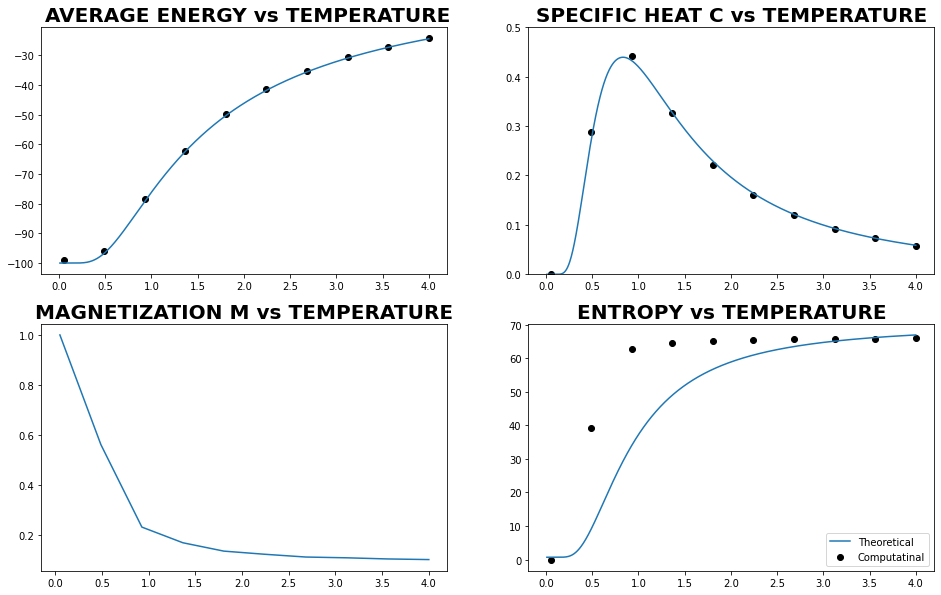

In [12]:
## Specific Heat Array
B2 = (1.0/temp_array)**2  ##beta sqyare
C = (B2/N)*(E2_avg-(E_avg)**2)  ##specific heat


                  
##calculating analytically                        
T_theory = np.linspace(0.01,4,1000)
E_theory = -N*J*np.tanh(J/T_theory)
aa = 1./np.cosh(J/T_theory)
CV_theory = (N*J/(T_theory**2))*(aa**2)
Entropy_theory = np.log(2)+ E_theory/T_theory +N*np.log(2./aa)
#########################

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (16,10))

ax1.set_title(" AVERAGE ENERGY vs TEMPERATURE",fontweight='bold',fontsize='20')
ax1.scatter(temp_array,E_avg,color = 'k',label = "Computational")
ax1.plot(T_theory,E_theory,label = "Theoretical")



ax2.set_title("SPECIFIC HEAT C vs TEMPERATURE",fontweight='bold',fontsize='20')
ax2.scatter(temp_array,C,color = 'k',label = "Computatinal")
ax2.plot(T_theory,CV_theory/N,label = "Theoretical")
ax2.set_ylim(0,.5)

ax3.set_title("MAGNETIZATION M vs TEMPERATURE",fontweight='bold',fontsize='20')
ax3.plot(temp_array,M_avg/N,label = "Computatinal")





ax4.set_title("ENTROPY vs TEMPERATURE",fontweight='bold',fontsize='20')
ax4.scatter(temp_array,Entropy_avg,color = 'k',label = "Computatinal")
ax4.plot(T_theory,Entropy_theory,label = "Theoretical")
plt.legend()
plt.show()

### **2.** **IN THE PRESENCE OF EXTERNAL FIELD**
> In the cell below i will be plotting the final configuration , energy and magnetization at different steps for a particular value of (T,H,J) whose values can be adjusted using sliders

In [13]:
import numpy as np   ##importing libraries
from tqdm import tqdm
import matplotlib.pyplot as plt
from ipywidgets import*
from matplotlib import patches as pt

def spin_color(SS):   ## this function is for plotting spins. down spin is cyan and up spin is red
    if SS==-1: return 'c';
    else: return 'r'

    
###creating some sliders for external field,J,Temperature     

H = FloatSlider(description="External Field",value = 1,min = -10,max = 10,layout={'width':'700px'})
J = FloatSlider(description="Interaction Constant",value = 1,min = -10,max = 10,layout={'width':'700px'})
t = FloatSlider(min = 0.1,max = 10,value = 0.1,description="Temperature",layout={'width':'700px'})
N_iter = IntSlider(description="iteration number",step = 500,value = 10000,min = 500,max = 200000,layout={'width':'700px'})
display (H,J,t)  ##displaying them
    
def Initial(n,S_C):   ##this is the initial function that will set up the initial configuration of spins i.e. Total numbers and Spin array
    global N,Spin_array;  
    ##S_C is dropdown that will allow us to select the three configurations i.e. random spin or aligned spins
    
    if(S_C==1): 
        spin_values = np.array([1,-1])
        Spin_array = np.random.choice(spin_values,size = n)  ##making random spins
        
    elif(S_C==2):
        Spin_array = np.ones(n) ##making all up
    else:
        Spin_array= -1*np.ones(n) ##making all down
    
    N=n  ## So i can use these parameters in next cell


    
    fig,ax = plt.subplots(figsize = (16,10))  ##plotting spins in the figure

    ax.set_xlim(-0.2,n)
    ax.set_ylim(-2,2)

    display(Text(value="Run the cell blow after setting the configuration",disabled=True,layout={'width':'400px'}))
    for i in range(n):

        PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
        ax.add_patch(PP) 
        
    plt.show()



##this interactive function will communicate with the initialize function and provide it the values       
w = interactive(Initial,n = IntSlider(description="Total Spin N",min = 10,max = 1000,step=10,value = 100,layout={'width':'700px'}),
                 S_C = Dropdown(options=[('Random',1),('All up',2),('All Down',3)],value=1,
                                description="Spin Configuration :" ),
                 )

display(N_iter,w)
                 

FloatSlider(value=1.0, description='External Field', layout=Layout(width='700px'), max=10.0, min=-10.0)

FloatSlider(value=1.0, description='Interaction Constant', layout=Layout(width='700px'), max=10.0, min=-10.0)

FloatSlider(value=0.1, description='Temperature', layout=Layout(width='700px'), max=10.0, min=0.1)

IntSlider(value=10000, description='iteration number', layout=Layout(width='700px'), max=200000, min=500, step…

interactive(children=(IntSlider(value=100, description='Total Spin N', layout=Layout(width='700px'), max=1000,…

100%|██████████| 10000/10000 [00:00<00:00, 54736.49it/s]


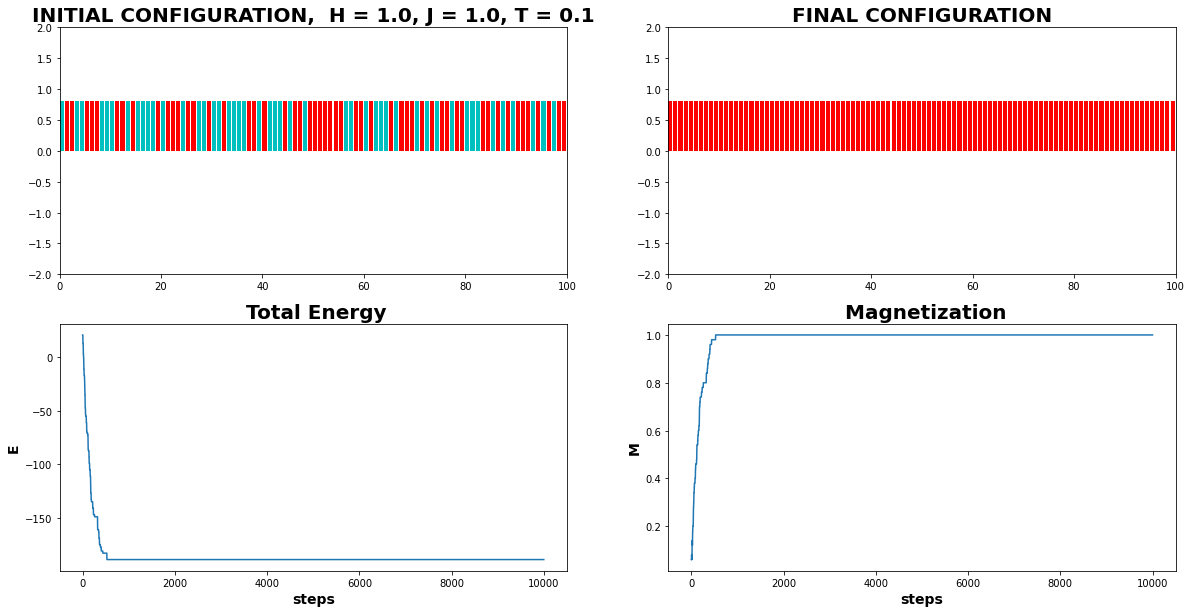

In [14]:
##taking value of the sliders
h = H.value  
j  = J.value
Temp = t.value
############


Beta = 1.0/Temp


##Energy  due to interaction term
energy1 = 0

for i in range(N-1):
    energy1 += -j*Spin_array[i]*Spin_array[i+1]
energy1 += -j*(Spin_array[0]+Spin_array[N-1])    

energy2 = h*np.sum(Spin_array) ##energy due to external field

energy = energy1+energy2  ##total energy
E = [energy] ##storing total energy in a list

m = np.sum(Spin_array)  ##total magnetic moment
Mag = [m] ##storing in a list



fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (20,10))  ##creating subplots
##plotting again the initial configuration
ax1.set_title("INITIAL CONFIGURATION,  H = " +str(h)+ ", J = "+str(j)+", T = "+str(Temp),fontweight='bold',fontsize='20')
ax1.set_xlim(0,N)
ax1.set_ylim(-2,2)
for i in range(N):

    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax1.add_patch(PP)  
###############



iter = N_iter.value
STEP = [0]  ##to store the number of iteration
for i in tqdm(range(iter)):
    r_n = np.random.randint(0,N)  ##choosing random number
    sigma_mu = Spin_array[r_n] ##spin value of selected spin
    del_m = -2*sigma_mu  ##change in magnetic momnet
    
    ########change in energy with periodic boundary condition
    if(r_n == 0):
        Sum = 2*j*sigma_mu*(Spin_array[1]+Spin_array[N-1])+2*h*sigma_mu
    elif(r_n == N-1):
        Sum = 2*j*sigma_mu*(Spin_array[N-2]+Spin_array[0])+2*h*sigma_mu
    else:
        Sum = 2*j*sigma_mu*(Spin_array[r_n+1]+Spin_array[r_n-1]) +2*h*sigma_mu
        
    del_E = Sum
    ############################3
    
    
    STEP.append(i+1)  ##

     
    if(np.random.uniform()<np.exp(-Beta*del_E)): ##applying metropolis algorithm
        
        Spin_array[r_n] = -1*Spin_array[r_n]  ##flipping spin sign
        energy += del_E  ##finding energy of new state $\nu$
        m+= del_m  ##finding magnetic moment of new state $\nu$
     
    else:
        Spin_array[r_n] =Spin_array[r_n]  ##i.e. it does nothing and leave the sysytem as it is 
        
    E.append(energy)  ##storing total energy
    Mag.append(m)  ##
         

##for plotting of final configuration
ax2.set_xlim(0,N)
ax2.set_ylim(-2,2)
ax2.set_title("FINAL CONFIGURATION",fontweight='bold',fontsize='20')

for i in range(N):
       
    
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax2.add_patch(PP)
#################################################################
    
## Plotting energy vs Steps to analyzing equillibrium     
ax3.set_title(" Total Energy",fontweight='bold',fontsize='20')
ax3.set_xlabel("steps",fontweight='bold',fontsize='14')
ax3.set_ylabel("E",fontweight='bold',fontsize='14')
ax3.plot(STEP,E)
## Plotting Magnetization"vs Steps to analyzing equillibrium    
ax4.set_title(" Magnetization",fontweight='bold',fontsize='20')
ax4.set_xlabel("steps",fontweight='bold',fontsize='14')
ax4.set_ylabel("M",fontweight='bold',fontsize='14')
ax4.plot(STEP,np.array(Mag)/N)
plt.show()



---
"What is the magnetization at such-and-such a temperature?",
or "How does the internal energy behave with temperature over such-and such
a range?" To answer these questions we have to do two things. First we
have to run our simulation for a suitably long period of time until it has come
to equilibrium at the temperature we are interested in—this period is called
the equilibration time and then we have to measure the quantity we
are interested in over another suitably long period of time and average it!! I will be finding how  Magnetization changes with temperature and verify the formula -

---------------------------------------------------------------------------------------------------
### **Expression of Magnetization**

by solving 1d Ising model analytically we get the following expression

\begin{align}
m = \frac{sinh(\beta h)}{\sqrt{e^{-4\beta J} +sinh^2(\beta h)}}
\end{align}

we will compute Magnetization both analytically and numerically and see whether data obtained from  $Metropolis \ \ algorithm$ satisfies upper equation or not

---  
Running Metropolis algorithm upto 20,000 steps so that it reaches equilibrium and after that start sampling data for Magnetization for different values of $H$. Choosing random configuration initially for each value of $H$. by taking  N = 500 (number of spins) and $J =1$

100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


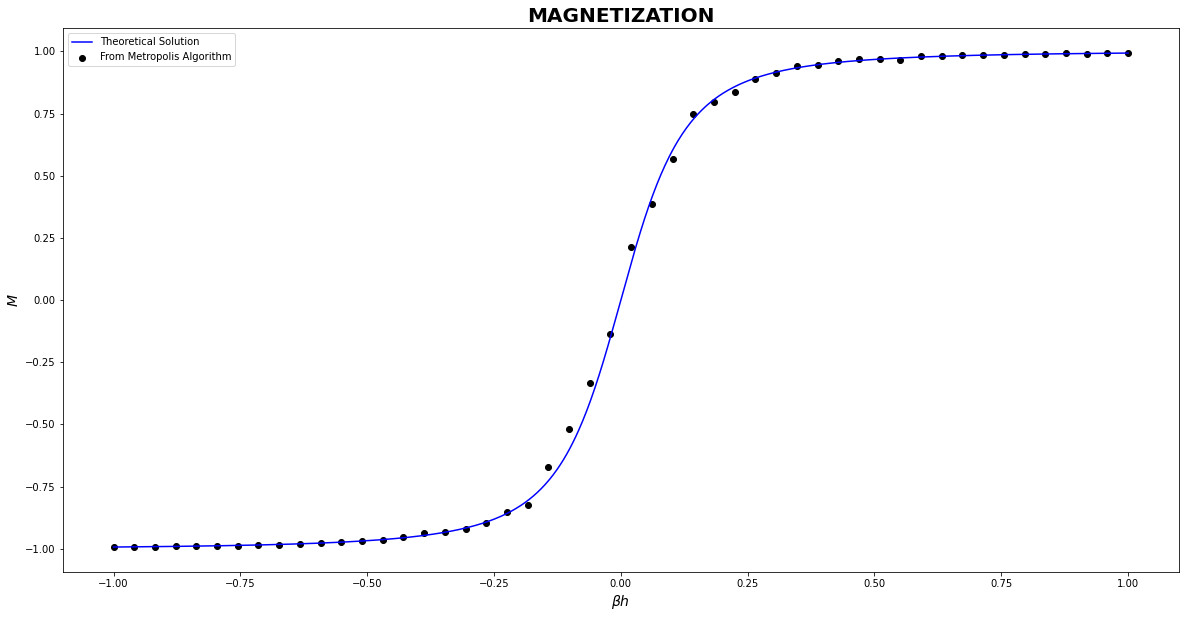

In [15]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from ipywidgets import*
from matplotlib import patches as ptiter

spin_values = np.array([1,-1])
N = 500 #number of spins
Beta = 1 ## Taking Beta to be constant
j = 1


H_array = np.linspace(-1,1,50)  ##external field values

N_iter = int(len(H_array))  ##number of field in External field array
Mag_avg = np.array([])  ##this will contain average values of magnetization

for iter in tqdm(range(N_iter)): ## Main Loop for Calculating mean magnetization for each H 
    Spin_array = np.random.choice(spin_values,size = N) ##Taking random configuration of spin each time
    h = H_array[iter] ##indexinx value of external field

    
    m = np.sum(Spin_array)
    Mag = []  #creating list to store total moment
    
    n_steps = 50000
    
    for i in range(n_steps):
        r_n = np.random.randint(0,N)  ##choosing random number
        sigma_mu = Spin_array[r_n] ##spin value of selected spin
        del_m = -2*sigma_mu  ##change in magnetic momnet

        ########change in energy with periodic boundary condition
        if(r_n == 0):
            Sum = 2*j*sigma_mu*(Spin_array[1]+Spin_array[N-1])+2*h*sigma_mu
        elif(r_n == N-1):
            Sum = 2*j*sigma_mu*(Spin_array[N-2]+Spin_array[0])+2*h*sigma_mu
        else:
            Sum = 2*j*sigma_mu*(Spin_array[r_n+1]+Spin_array[r_n-1]) +2*h*sigma_mu

        del_E = Sum




        if(np.random.uniform()<np.exp(-Beta*del_E)):

            Spin_array[r_n] = -1*Spin_array[r_n]
            m+= del_m

        else:
            Spin_array[r_n] =Spin_array[r_n]
            
            
        km = 0 ###just to put a break
        if(i>=10000 and i%N==0): ##sampling values of magnetization after 10000 steps
            Mag.append(m)
            
    Mag = np.array(Mag)
    Mag_avg = np.append(Mag_avg,np.mean(Mag))

def M_theory(hi):
    KK = (np.sinh(Beta*hi))/(np.sqrt(np.exp(-4*Beta*j) +(np.sinh(Beta*hi))**2))
    return KK;

H_th_array = np.linspace(-1,1,1000)
M_TH = np.array([M_theory(hv) for hv in H_th_array])

plt.figure(figsize = (20,10))
plt.title("MAGNETIZATION",fontweight='bold',fontsize='20')
plt.xlabel(r'$\beta h$',fontweight='bold',fontsize='14')
plt.ylabel(r'$M$',fontweight='bold',fontsize='14')
plt.plot(Beta*H_th_array,M_TH,color = 'b',label = "Theoretical Solution")
plt.scatter(Beta*H_array,Mag_avg/(N),color ='k',label = "From Metropolis Algorithm")
plt.legend()
plt.show()